### Average Monthly Temperatures for Orange County, California and Washtenaw County, Michigan over 120 years

July 9, 2021

This project was completed for Coursera's University of Michigan Applied Data Science with Python course. The goal was to plot and compare average monthly temperatures for the past 120 years for Orange County, California and Washtenaw County, Michigan and assess if there is indeed a global warming trend experienced at the micro county level.  Eyeballing the visual, it is clear that a warming trend is occurring for both counties when looking over this period as compared to the overall average for each county.

Data Sources (no longer functioning when checked on 2022-05-05):<br>
Orange County, California<br>
https://www.ncdc.noaa.gov/cag/county/time-series/CA-059/tavg/12/4/1901-2021?base_prd=true&begbaseyear=1901&endbaseyear=2000

Washtenaw County, Michigan<br>
https://www.ncdc.noaa.gov/cag/county/time-series/MI-161/tavg/12/4/1901-2021?base_prd=true&begbaseyear=1901&endbaseyear=2000

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

dfo = pd.read_csv('Orange-1901-2021.csv')
dfw = pd.read_csv('Washtenaw-2021.csv')
dfo = dfo.drop([0,1,2,3])
dfw = dfw.drop([0,1,2,3])

dfo.columns = ['Year', 'OC Annual Avg Temp', 'DEL1', 'DEL2']
dfo.drop(['DEL1', 'DEL2'], axis=1,  inplace=True)
dfo['OC Annual Avg Temp'] = dfo['OC Annual Avg Temp'].astype(float)
dfo['Year'] = dfo['Year'].astype(int)
dfo['Year'] = dfo['Year'].floordiv(100)
OC_cent_avg = dfo["OC Annual Avg Temp"].mean()
print("OC Centennial+ Avg:", OC_cent_avg)

dfw.columns = ['Year', 'WC Annual Avg Temp', 'DEL1', 'DEL2']
dfw.drop(['DEL1', 'DEL2'], axis=1,  inplace=True)
dfw['WC Annual Avg Temp'] = dfw['WC Annual Avg Temp'].astype(float)
dfw['Year'] = dfw['Year'].astype(int)
dfw['Year'] = dfw['Year'].floordiv(100)
WC_cent_avg = dfw["WC Annual Avg Temp"].mean()
print("WC Centennial+ Avg:", WC_cent_avg)
dfo = dfo.merge(dfw, how='inner', on='Year')
print(dfo.shape)
print(dfw.shape)

OC Centennial+ Avg: 62.75289256198348
WC Centennial+ Avg: 47.113223140495876
(121, 3)
(121, 2)


Text(0.5, 1.0, 'Orange County, CA and Washtenaw County, MI\nAnnual Average Temperatures\nfrom 1901 to 2021')

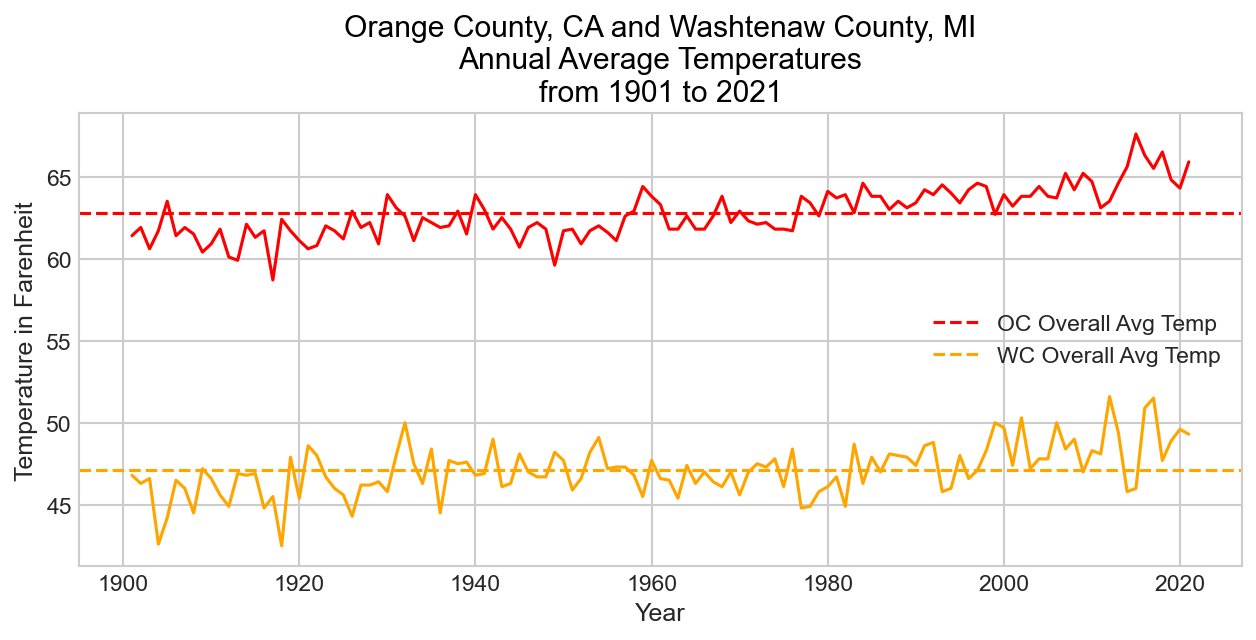

In [2]:
sns.set()
plt.figure(figsize=(10,4), dpi=150)
plt.style.use('seaborn-whitegrid')
plt.plot(dfo['Year'], dfo['OC Annual Avg Temp'], color='red')
plt.plot(dfo['Year'], dfo['WC Annual Avg Temp'], color='orange')
plt.xlabel('Year')
plt.ylabel('Temperature in Farenheit')
plt.axhline(OC_cent_avg, color='red', linestyle='dashed', linewidth=1.5, 
            label='OC Overall Avg Temp')
plt.axhline(WC_cent_avg, color='orange', linestyle='dashed', linewidth=1.5, 
            label='WC Overall Avg Temp')
plt.legend(loc='center right')
plt.title('Orange County, CA and Washtenaw County, MI\nAnnual Average Temperatures\nfrom 1901 to 2021', 
          color='black', size='large')